# Proyecto Final

Hugo J. Rodas
17006259

## Tabla de Contenidos

#### I. Analisis Exploratorio de Datos
#### II. Correlacion
#### III. Funcion para Entrenamiento
#### IV. Error en el Tiempo (Curvas de Aprendizaje)
#### V. Modelo Entrenado en el Tiempo
#### VI. Scikit-Learn (LinearRegression)
#### VII. Promedio de Predicciones
#### VIII. Errores de los Modelos






**Descripcion de los Datos**

"Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
1stFlrSF: First Floor square feet

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

LotFrontage: Linear feet of street connected to property"

In [131]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filename = 'proyecto_training_data.npy'

dataset = np.load(filename)
print(dataset[:10,:])

[[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]
 [1.815e+05 6.000e+00 1.262e+03 6.000e+00 1.976e+03 8.000e+01]
 [2.235e+05 7.000e+00 9.200e+02 6.000e+00 2.001e+03 6.800e+01]
 [1.400e+05 7.000e+00 9.610e+02 7.000e+00 1.915e+03 6.000e+01]
 [2.500e+05 8.000e+00 1.145e+03 9.000e+00 2.000e+03 8.400e+01]
 [1.430e+05 5.000e+00 7.960e+02 5.000e+00 1.993e+03 8.500e+01]
 [3.070e+05 8.000e+00 1.694e+03 7.000e+00 2.004e+03 7.500e+01]
 [2.000e+05 7.000e+00 1.107e+03 7.000e+00 1.973e+03       nan]
 [1.299e+05 7.000e+00 1.022e+03 8.000e+00 1.931e+03 5.100e+01]
 [1.180e+05 5.000e+00 1.077e+03 5.000e+00 1.939e+03 5.000e+01]]


Separacion del dataset para que:
- 80% sea para el entrenamiento, datos de entrenamiento
- 20% para validacion, datos de validacion y pruebas

In [3]:
lengthdata = len(dataset)

train_perc = 0.80
valid_perc = 1 - train_perc

train_length = int( lengthdata * train_perc)
valid_length = int( lengthdata * valid_perc)

train_data = dataset[0:train_length,:]
valid_data = dataset[train_length:lengthdata,:]

print(len(train_data) + len(valid_data))

1460


Separacion de train_data en cada variable.

In [201]:
# Subconjuntos para Entrenamiento
SalePrice = train_data[:,0]
OverallQual = train_data[:,1]
FirstFlrSF = train_data[:,2]
TotRmsAbvGrd = train_data[:,3]
YearBuilt = train_data[:,4]
LotFrontage = train_data[:,5]

#Excluyendo nan de LotFrontage para LotFrontage y para SalePrice
LotFrontage_exLFnan = LotFrontage[np.logical_not(np.isnan(LotFrontage))]
SalePrice_exLFnan = SalePrice[np.logical_not(np.isnan(LotFrontage))]


# Subconjuntos para Validacion
SalePrice_val = valid_data[:,0]
OverallQual_val = valid_data[:,1]
FirstFlrSF_val = valid_data[:,2]
TotRmsAbvGrd_val = valid_data[:,3]
YearBuilt_val = valid_data[:,4]
LotFrontage_val = valid_data[:,5]


### I. Analisis Exploratorio de Datos

○	Para cada variable en el dataset calcular((usando numpy):

- media

- valor máximo

- valor mínimo 

- rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)

- desviación estándar 


In [5]:
SalePrice_stat = {'media': np.mean(SalePrice), 'max':np.max(SalePrice), 'min':np.min(SalePrice), 'rango': (np.max(SalePrice) - np.min(SalePrice)), 'des_est':np.std(SalePrice)}
OverallQual_stat = {'media': np.mean(OverallQual), 'max':np.max(OverallQual), 'min':np.min(OverallQual), 'rango': (np.max(OverallQual) - np.min(OverallQual)), 'des_est':np.std(OverallQual)}
FirstFlrSF_stat = {'media': np.mean(FirstFlrSF), 'max':np.max(FirstFlrSF), 'min':np.min(FirstFlrSF), 'rango': (np.max(FirstFlrSF) - np.min(FirstFlrSF)), 'des_est':np.std(FirstFlrSF)}
TotRmsAbvGrd_stat = {'media': np.mean(TotRmsAbvGrd), 'max':np.max(TotRmsAbvGrd), 'min':np.min(TotRmsAbvGrd), 'rango': (np.max(TotRmsAbvGrd) - np.min(TotRmsAbvGrd)), 'des_est':np.std(TotRmsAbvGrd)}
YearBuilt_stat = {'media': np.mean(YearBuilt), 'max':np.max(YearBuilt), 'min':np.min(YearBuilt), 'rango': (np.max(YearBuilt) - np.min(YearBuilt)), 'des_est':np.std(YearBuilt)}
LotFrontage_stat = {'media': np.nanmean(LotFrontage), 'max':np.nanmax(LotFrontage), 'min':np.nanmin(LotFrontage), 'rango': (np.nanmax(LotFrontage) - np.nanmin(LotFrontage)), 'des_est':np.nanstd(LotFrontage)}

print('SalePrice_stat:', SalePrice_stat)
print('OverallQual_stat:', OverallQual_stat)
print('FirstFlrSF_stat:', FirstFlrSF_stat)
print('TotRmsAbvGrd_stat:', TotRmsAbvGrd_stat)
print('YearBuilt_stat:', YearBuilt_stat)
print('LotFrontage_stat:', LotFrontage_stat)



SalePrice_stat: {'media': 180590.27739726027, 'max': 755000.0, 'min': 34900.0, 'rango': 720100.0, 'des_est': 78781.95108033362}
OverallQual_stat: {'media': 6.101027397260274, 'max': 10.0, 'min': 1.0, 'rango': 9.0, 'des_est': 1.377435193240741}
FirstFlrSF_stat: {'media': 1156.3236301369864, 'max': 3228.0, 'min': 334.0, 'rango': 2894.0, 'des_est': 373.620331503586}
TotRmsAbvGrd_stat: {'media': 6.4854452054794525, 'max': 14.0, 'min': 2.0, 'rango': 12.0, 'des_est': 1.6084517167387253}
YearBuilt_stat: {'media': 1971.451198630137, 'max': 2010.0, 'min': 1875.0, 'rango': 135.0, 'des_est': 29.93888206867768}
LotFrontage_stat: {'media': 69.94698544698545, 'max': 313.0, 'min': 21.0, 'rango': 292.0, 'des_est': 23.4659548199304}


○	Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable.

**1. Precio de Venta (SalePrice):**

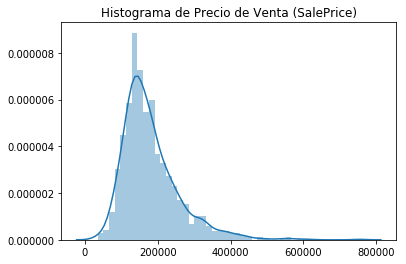

In [6]:
sns.distplot(SalePrice)
plt.title("Histograma de Precio de Venta (SalePrice)")
plt.show()

**2. Calidad en General (OverallQual):**

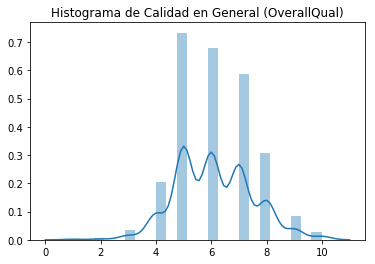

In [7]:
sns.distplot(OverallQual,label="Calidad en General (OverallQual)")
plt.title("Histograma de Calidad en General (OverallQual)")
plt.show()

**3. Pies Cuadrados del Primer Nivel (FirstFlrSF):**

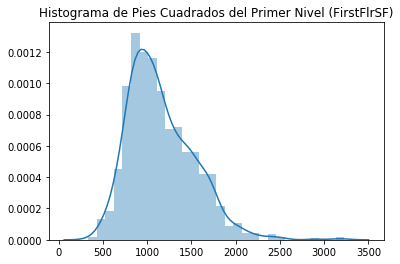

In [8]:
sns.distplot(FirstFlrSF,label="Pies Cuadrados del Primer Nivel (FirstFlrSF)")
plt.title("Histograma de Pies Cuadrados del Primer Nivel (FirstFlrSF)")
plt.show()

**4. Total de Habitaciones Arriba del nivel del Suelo (TotRmsAbvGrd):**

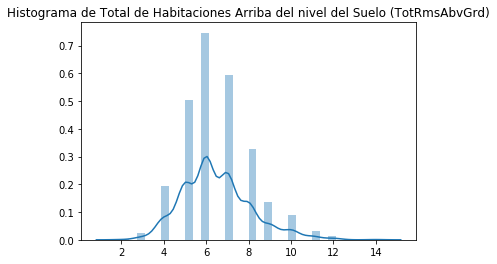

In [9]:
sns.distplot(TotRmsAbvGrd,label="Total de Habitaciones Arriba del nivel del Suelo (TotRmsAbvGrd)")
plt.title("Histograma de Total de Habitaciones Arriba del nivel del Suelo (TotRmsAbvGrd)")
plt.show()

**5. Año de Construcción (YearBuilt):**

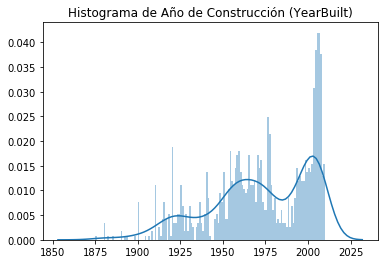

In [10]:
sns.distplot(YearBuilt,label="Año de Construcción (YearBuilt)",bins=int(YearBuilt_stat['rango']))
plt.title("Histograma de Año de Construcción (YearBuilt)")
plt.show()

**6. Pies de Calle conectada a la Propiedad (LotFrontage):**

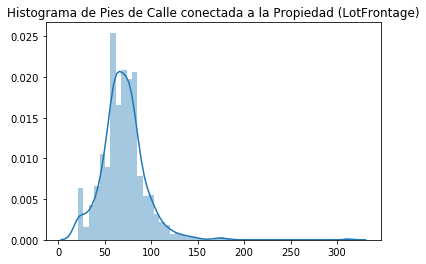

In [11]:
sns.distplot(LotFrontage[np.logical_not(np.isnan(LotFrontage))],label="Pies de Calle conectada a la Propiedad (LotFrontage)")
plt.title("Histograma de Pies de Calle conectada a la Propiedad (LotFrontage)")
plt.show()

### II. Correlacion

●	Para cada variable independiente x :

○	Calcular el coeficiente de correlación entre x y y

○	graficar x vs y(scatterplot) usando matplotlib

○	Colocar el coeficiente de correlación como parte del título de la gráfica. 


In [12]:
SP_Corr = {'OverallQual': np.corrcoef(SalePrice,OverallQual)[1,0],
                  'FirstFlrSF': np.corrcoef(SalePrice,FirstFlrSF)[1,0],
                  'TotRmsAbvGrd': np.corrcoef(SalePrice,TotRmsAbvGrd)[1,0],
                  'YearBuilt': np.corrcoef(SalePrice,YearBuilt)[1,0],
                  'LotFrontage': np.corrcoef(SalePrice_exLFnan,LotFrontage_exLFnan)[1,0],}
print(SP_Corr)

{'OverallQual': 0.7939900504626405, 'FirstFlrSF': 0.6162887000998717, 'TotRmsAbvGrd': 0.5647069399593065, 'YearBuilt': 0.5341706927117515, 'LotFrontage': 0.363291616653892}


**1. Precio de Venta (SalePrice) vs. Calidad en General (OverallQual):**

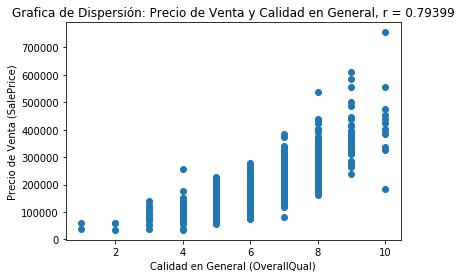

In [13]:
plt.scatter(OverallQual,SalePrice)

SP_OQ_r_title = ('Grafica de Dispersión: Precio de Venta y Calidad en General, ' + 'r = '+ str(round(SP_Corr['OverallQual'],5)))

plt.xlabel("Calidad en General (OverallQual)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title(SP_OQ_r_title)
plt.show()

**2. Precio de Venta (SalePrice) vs. Pies Cuadrados del Primer Nivel (FirstFlrSF):**

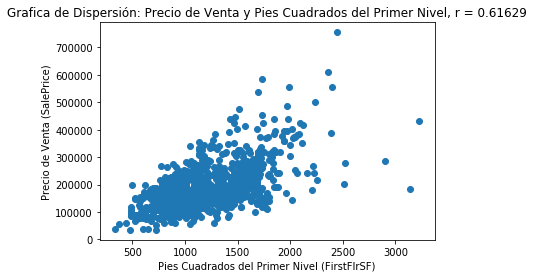

In [14]:
plt.scatter(FirstFlrSF,SalePrice)

SP_1stFLSF_r_title = ('Grafica de Dispersión: Precio de Venta y Pies Cuadrados del Primer Nivel, ' + 'r = '+ str(round(SP_Corr['FirstFlrSF'],5)))

plt.xlabel("Pies Cuadrados del Primer Nivel (FirstFlrSF)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title(SP_1stFLSF_r_title)
plt.show()

**3. Precio de Venta (SalePrice) vs. Total de Habitaciones Arriba del nivel del Suelo (TotRmsAbvGrd):**

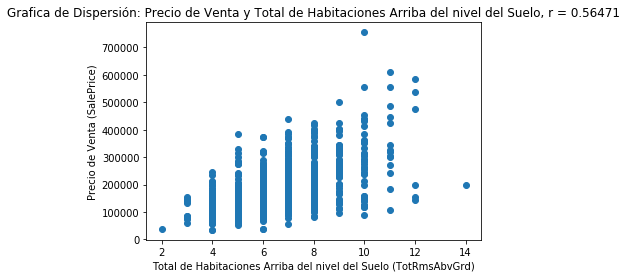

In [15]:
plt.scatter(TotRmsAbvGrd,SalePrice)

SP_RMAB_r_title = ('Grafica de Dispersión: Precio de Venta y Total de Habitaciones Arriba del nivel del Suelo, ' + 'r = '+ str(round(SP_Corr['TotRmsAbvGrd'],5)))

plt.xlabel("Total de Habitaciones Arriba del nivel del Suelo (TotRmsAbvGrd)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title(SP_RMAB_r_title)
plt.show()

**4. Precio de Venta (SalePrice) vs. Año de Construcción (YearBuilt):**

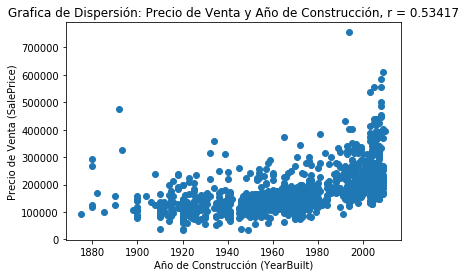

In [16]:
plt.scatter(YearBuilt,SalePrice)

SP_YB_r_title = ('Grafica de Dispersión: Precio de Venta y Año de Construcción, ' + 'r = '+ str(round(SP_Corr['YearBuilt'],5)))

plt.xlabel("Año de Construcción (YearBuilt)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title(SP_YB_r_title)
plt.show()

**5. Precio de Venta (SalePrice) vs. Pies de Calle conectada a la Propiedad (LotFrontage):**

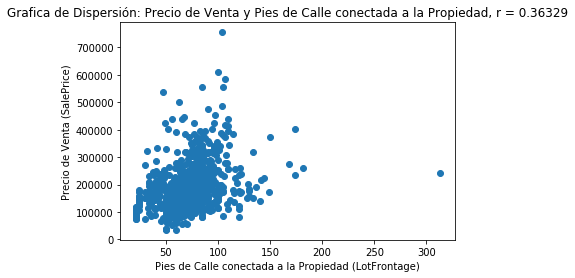

In [17]:
plt.scatter(LotFrontage,SalePrice)

SP_LF_r_title = ('Grafica de Dispersión: Precio de Venta y Pies de Calle conectada a la Propiedad, ' + 'r = '+ str(round(SP_Corr['LotFrontage'],5)))

plt.xlabel("Pies de Calle conectada a la Propiedad (LotFrontage)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title(SP_LF_r_title)
plt.show()

●	Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo (las 2 que presentan mayor correlación).

Las dos variables con más potencial predictivo, es decir los que tienen coeficientes de correlacion mas alto, son:
1. Calidad en General (OverallQual) con r = 0.7939900504626405, y

2. Pies Cuadrados del Primer Nivel (FirstFlrSF) con r = 0.6162887000998717

### III. Funcion para Entrenamiento


●	Crear una función para entrenar un modelo de regresión lineal de una variable 
y = mx +b.
La función recibe como argumentos:

○	 vector con  la variable independiente “x” ,  
○	vector con la variable dependiente “y”,  
○	un entero “epochs” que indica por cuantas iteraciones entrenar el modelo,

○	un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.

○	escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

La función debe:

○	Crear una matriz de 2 columnas ,la primera columna corresponde al vector de datos “x” y la segunda columna de la matriz para todas las filas es igual a 1. Por ejemplo:
Si el vector x originalmente contenía los valores: [1,3,5,6] debemos obtener:

1	1
3	1
5	1
6	1


In [194]:
# Vectores de prueba
vectorrrx = np.linspace(1,10,10,endpoint=True,retstep=False)
vectorrry = vectorrrx*2 + 3

print(vectorrrx)
print(vectorrry)

def funcio(x,y,EPOCHS,imprimir_error_cada,lr):
    matrixx = np.array(np.matrix([x,np.ones_like(x)]).transpose())
    m = 0
    b = 0
    param = np.expand_dims(np.array([m,b]),1)
    param_dict = {0:list(np.squeeze(param))}
    
    y_hat = np.expand_dims(np.empty(1),1)
    error_vect = np.expand_dims(np.empty(0),1)
    y = np.expand_dims(np.array(y),1)
    
    for e in range(EPOCHS):
                
        y_hat = np.matmul(matrixx,param)
        
        error = (y - y_hat)**2
        error_vect = np.append(error_vect,np.mean(error)/2)
        
        diff_y = y_hat - y
        
        grads = np.mean(diff_y * matrixx, axis=0)
        
        param = param - lr * np.expand_dims(grads,1)
        
        param_dict[e+1] = list(np.squeeze(param))                         

        if (e+1)%imprimir_error_cada == 0 :
            print("Error "+ str(e+1) + ": " + str(np.mean(error)/2))
    return param_dict, error_vect
        

funcio(vectorrrx, vectorrry,EPOCHS=3,imprimir_error_cada=1,lr=2)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23.]
Error 1: 114.5
Error 2: 684581.25
Error 3: 4120262681.25


({0: [0, 0],
  1: [187.0, 28.0],
  2: [-14333.0, -2057.0],
  3: [1112122.0, 159748.0]},
 array([1.14500000e+02, 6.84581250e+05, 4.12026268e+09]))

Utilizando la funcion para cada una de las variables.

**y = Saleprice**



In [195]:
# y = Saleprice

# np.sum(np.isnan(LotFrontage_exLFnan))

# x = OverallQual #(si funciona bien)
OverallQual_model = funcio(OverallQual, SalePrice,200,300,0.0008)
# print("Diccionario de Parametros")
# print(OverallQual_model[0])
# print("Vector de Errores:")
# print(OverallQual_model[1])

# x = FirstFlrSF # (no funciona bien)
FirstFlrSF_model = funcio(FirstFlrSF, SalePrice,400,300,0.000000008)
# print(FirstFlrSF_model[0])
# print(FirstFlrSF_model[1])


#x = TotRmsAbvGrd #(si funciona bien)
TotRmsAbvGrd_model = funcio(TotRmsAbvGrd, SalePrice,250,300,0.001)
# print(TotRmsAbvGrd_model)

# x = YearBuilt # (no funciona bien)
YearBuilt_model = funcio(YearBuilt, SalePrice,700,300,0.0000000012)
# print(YearBuilt_model)

# x = LotFrontage (no funciona bien)
LotFrontage_model = funcio(LotFrontage_exLFnan, SalePrice_exLFnan,80000,40000,0.000000000000000125)
# print(LotFrontage_model)


Error 300: 1982391234.2000465
Error 300: 3993654744.809507
Error 600: 3052073225.2204757
Error 40000: 19847898534.981144
Error 80000: 19847897641.02886


### IV. Error en el Tiempo

Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:


In [22]:
def visualizar_error(vector):
    plt.plot(vector)
    plt.xlabel('Iteracion')
    plt.ylabel('Error')

    plt.title("Error en el Tiempo",fontsize=15)
    plt.show()


**Overall Quality**

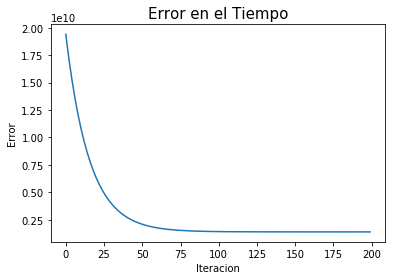

In [113]:
visualizar_error(OverallQual_model[1])

**First Floor Square Foot**

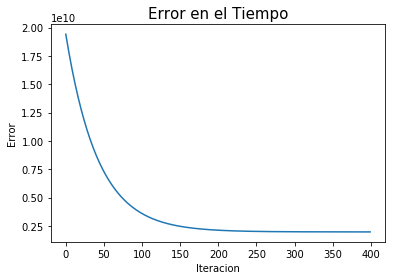

In [133]:
visualizar_error(FirstFlrSF_model[1])

**Total Rooms Above Grade**

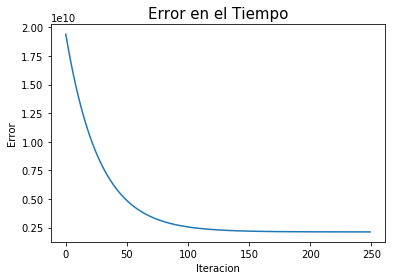

In [33]:
visualizar_error(TotRmsAbvGrd_model[1])

**Year Built**

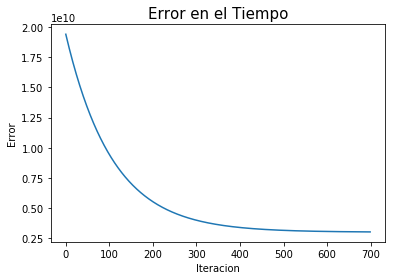

In [58]:
visualizar_error(YearBuilt_model[1])

**Lot Frontage**

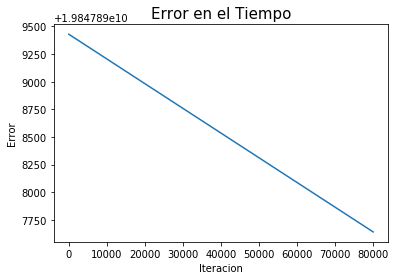

In [93]:
visualizar_error(LotFrontage_model[1])

### V. Modelado Entrenado en el Tiempo

●	Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo : Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

In [198]:
def graf_evol(datax,datay,modelo,n):
    plt.scatter(datax,datay)
    x = np.linspace(np.min(datax),np.max(datax),2)
    
    
    tot_iter = int(len(modelo[0])/n)
    
    labels =[]
    for i in range(tot_iter):
        
        m = modelo[0][(i+1)*n][0]
        
        b = modelo[0][(i+1)*n][1]
        
        y = m * x + b
        
        plt.plot(x, y, label=('y =' + str(m) + 'x + '+ str(b)))
        labels.append('Iteracion = ' + str((i+1)*n))
    plt.legend(labels)
    



**Overall Quality**

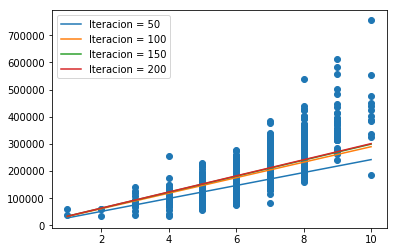

In [199]:
graf_evol(OverallQual, SalePrice, OverallQual_model,50)

**First Floor Square Feet**

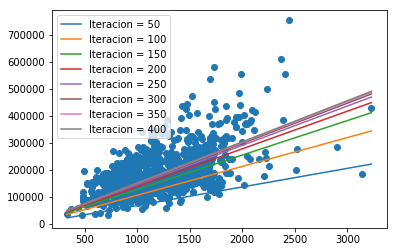

In [200]:
graf_evol(FirstFlrSF, SalePrice, FirstFlrSF_model,50)

### VI. Scikit Learn (LinearRegression)

●	Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Overall Quality**

Prediccion de m (coeficiente): [[45411.99877916]]
Prediccion de b (intercepto): [-96469.57131874]


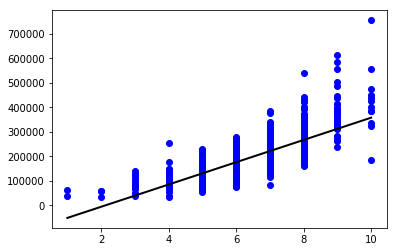

In [202]:
OverallQ_regre = LinearRegression()

OverallQ_regre.fit(OverallQual.reshape(-1,1), SalePrice.reshape(-1,1))

OverallQ_vectregre_x = np.linspace(min(OverallQual),max(OverallQual)).reshape(-1,1)

plt.scatter(OverallQual,SalePrice, color = 'blue')

plt.plot(OverallQ_vectregre_x, OverallQ_regre.predict(OverallQ_vectregre_x),color='black',linewidth = 2)

print("Prediccion de m (coeficiente): " + str(OverallQ_regre.coef_))
print("Prediccion de b (intercepto): " + str(OverallQ_regre.intercept_))

**First Floor Square Feet**

Prediccion de m (coeficiente): [[129.95124229]]
Prediccion de b (intercepto): [30324.58517496]


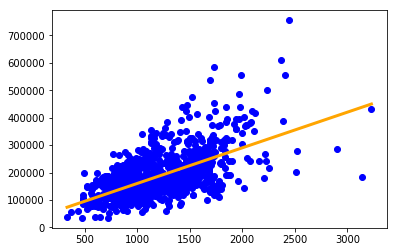

In [144]:
FirstFlrSF_regre = LinearRegression()

FirstFlrSF_regre.fit(FirstFlrSF.reshape(-1,1), SalePrice.reshape(-1,1))

FirstFlrSF_vectregre_x = np.linspace(min(FirstFlrSF),max(FirstFlrSF)).reshape(-1,1)

plt.scatter(FirstFlrSF,SalePrice, color = 'blue')

plt.plot(FirstFlrSF_vectregre_x, FirstFlrSF_regre.predict(FirstFlrSF_vectregre_x),color='orange',linewidth = 3)

print("Prediccion de m (coeficiente): " + str(FirstFlrSF_regre.coef_))
print("Prediccion de b (intercepto): " + str(FirstFlrSF_regre.intercept_))

### VII. Promedio de Predicciones

●	Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos, la función debe recibir como parámetro adicional un vector de cualquier tamaño de x  y devolver 3 vectores cada uno del mismo tamaño del vector x.

○	La predicción con el modelo entrenado manualmente

○	La predicción con el modelo de scikit-learn

○	La combinación(promedio) de las 2 anteriores.


In [182]:
def funcion_comparacion(mod_manual, mod_scikit,x):
    param_mod_manual = np.expand_dims(mod_manual[len(mod_manual[0])-1],1)
    # print("param_mod_manual")
    # print(param_mod_manual)
    
    param_mod_scikit = np.expand_dims(np.array([np.squeeze(mod_scikit.coef_),mod_scikit.intercept_]),1)
    # print("param_mod_scikit")
    # print(param_mod_scikit)
    
    
    matr = np.array(np.matrix([x,np.ones_like(x)]).transpose())
    # print(matr)
    pred_manual = np.matmul(matr,param_mod_manual)
    pred_scikit = np.matmul(matr,param_mod_scikit)
    pred_prom = (pred_manual + pred_scikit)/2
    
    return pred_manual, pred_scikit, pred_prom
    
    
# ejemplo
funcion_comparacion(OverallQual_model[0],OverallQ_regre,OverallQual_val)


(array([[5846.62105616],
        [9648.05361233],
        [5846.62105616],
        [5846.62105616],
        [6796.97919521],
        [4896.26291712],
        [5846.62105616],
        [7747.33733425],
        [4896.26291712],
        [5846.62105616],
        [4896.26291712],
        [4896.26291712],
        [6796.97919521],
        [7747.33733425],
        [9648.05361233],
        [4896.26291712],
        [4896.26291712],
        [4896.26291712],
        [2995.54663904],
        [7747.33733425],
        [6796.97919521],
        [6796.97919521],
        [3945.90477808],
        [7747.33733425],
        [4896.26291712],
        [5846.62105616],
        [5846.62105616],
        [5846.62105616],
        [6796.97919521],
        [6796.97919521],
        [6796.97919521],
        [3945.90477808],
        [3945.90477808],
        [6796.97919521],
        [4896.26291712],
        [6796.97919521],
        [4896.26291712],
        [6796.97919521],
        [3945.90477808],
        [5846.62105616],


### VIII. Errores de los Modelos

●	Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.

Para cada variable independiente “x” elegida : 

●	Graficar el  error de cada modelo para esta variable “x”

●	Concluir cuál modelo para la  variable “x” es el mejor a ser usado 


**Overall Quality**

In [185]:
OQ_error_mod_manual = np.mean(SalePrice_val - funcion_comparacion(OverallQual_model[0],OverallQ_regre,OverallQual_val)[0])
OQ_error_mod_scikit = np.mean(SalePrice_val - funcion_comparacion(OverallQual_model[0],OverallQ_regre,OverallQual_val)[1])
print(OQ_error_mod_manual)
print(OQ_error_mod_scikit)

176310.3732254996
2043.393825163998


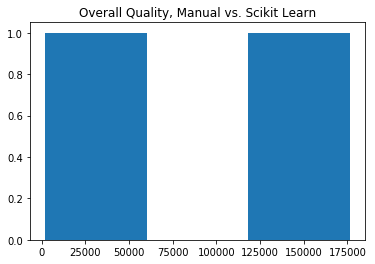

In [193]:
plt.hist([OQ_error_mod_manual,OQ_error_mod_scikit],bins=3)
plt.title("Overall Quality, Manual vs. Scikit Learn")
plt.show()